In [1]:
import nltk

In [3]:
import pandas as pd
import numpy as np

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
%matplotlib inline

In [2]:
# nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopword
Command 'stopword' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        duke\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.............. Chat-

        duke\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
df=pd.read_csv("spam.csv",encoding="latin1")

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [9]:
df.drop(columns=["Unnamed: 2",'Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
df.rename(columns={"v1":"label","v2":"messages"},inplace=True)

## EDA

In [18]:
df.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [21]:
df.groupby("label").describe().T

label                               ham  \
messages count                     4825   
         unique                    4516   
         top     Sorry, I'll call later   
         freq                        30   

label                                                         spam  
messages count                                                 747  
         unique                                                653  
         top     Please call our customer service representativ...  
         freq                                                    4

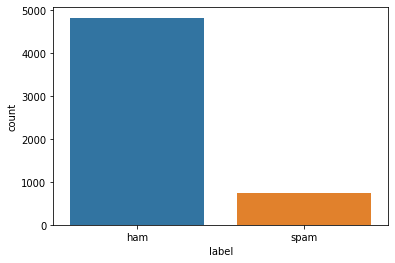

In [24]:
sns.countplot(df.label)

In [28]:
df["length"]=(df["messages"].apply(len))

In [29]:
df.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


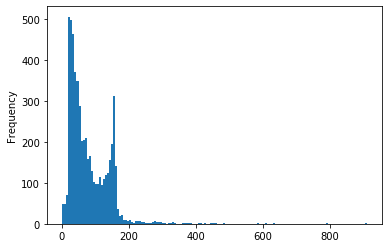

In [35]:
df["length"].plot.hist(bins=150)

In [37]:
df.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [40]:
df[df["length"]==910]["messages"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F48CD52BE0>,
      dtype=object)

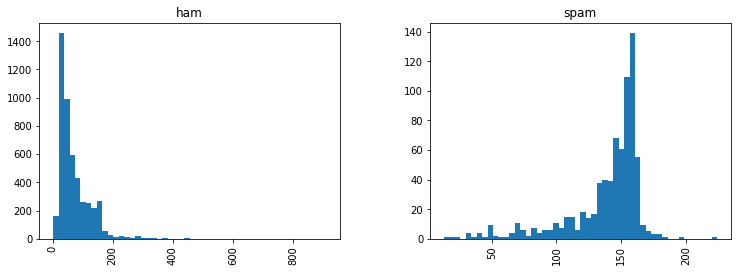

In [49]:
df.hist(column="length",bins=50,by="label",figsize=(12,4))

## Remove Stopwords and punctuations

In [50]:
import string

In [51]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
s="!hellow #pyth)on"

In [55]:
s1=[i for i in s if i not in string.punctuation]

In [58]:
"".join(s1)

'hellow python'

In [54]:
from nltk.corpus import stopwords

In [59]:
...

In [61]:
[i for i in a.split() if i.lower() not in stopwords.words('english')]

['hi', 'man']

In [72]:
def text_proc(text):
    nopunc=[i for i in text if i  not in string.punctuation]
    nopunc1="".join(nopunc)
    return [j for j in nopunc1.split() if j.lower() not in stopwords.words('english')]

In [71]:
df.messages.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: messages, dtype: object

In [73]:
df.messages.head().apply(text_proc)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

## Bag of words

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
cv=CountVectorizer(analyzer=text_proc)

In [81]:
bow=cv.fit(df.messages)

In [82]:
bow.vocabulary_

{'Go': 2027,
 'jurong': 7456,
 'point': 8809,
 'crazy': 5685,
 'Available': 1096,
 'bugis': 5136,
 'n': 8231,
 'great': 6846,
 'world': 11043,
 'la': 7567,
 'e': 6131,
 'buffet': 5135,
 'Cine': 1461,
 'got': 6815,
 'amore': 4574,
 'wat': 10845,
 'Ok': 3012,
 'lar': 7600,
 'Joking': 2407,
 'wif': 10952,
 'u': 10582,
 'oni': 8482,
 'Free': 1909,
 'entry': 6244,
 '2': 422,
 'wkly': 11003,
 'comp': 5535,
 'win': 10964,
 'FA': 1808,
 'Cup': 1529,
 'final': 6470,
 'tkts': 10398,
 '21st': 442,
 'May': 2754,
 '2005': 429,
 'Text': 3882,
 '87121': 860,
 'receive': 9143,
 'questionstd': 9050,
 'txt': 10570,
 'rateTCs': 9091,
 'apply': 4652,
 '08452810075over18s': 73,
 'U': 3996,
 'dun': 6118,
 'say': 9445,
 'early': 6136,
 'hor': 7091,
 'c': 5179,
 'already': 4551,
 'Nah': 2897,
 'dont': 6038,
 'think': 10320,
 'goes': 6786,
 'usf': 10681,
 'lives': 7740,
 'around': 4698,
 'though': 10337,
 'FreeMsg': 1911,
 'Hey': 2183,
 'darling': 5780,
 '3': 536,
 'weeks': 10891,
 'word': 11030,
 'back': 4814

In [83]:
len(bow.vocabulary_)

11304

In [84]:
mess4=df.messages[3]

In [85]:
mess4

'U dun say so early hor... U c already then say...'

In [88]:
bow4=bow.transform([mess4])

In [90]:
print(bow4)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2


In [91]:
bow4.shape

(1, 11304)

In [97]:
bow.get_feature_names()[8954]

'prob'

In [98]:
messages_bow=bow.transform(df['messages'])

In [99]:
messages_bow.shape

(5572, 11304)

In [102]:
messages_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## TF_IDF

In [103]:
from sklearn.feature_extraction.text import TfidfTransformer

In [115]:
tf=TfidfTransformer()

In [117]:
tf.fit(messages_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [113]:
tf41=tf1.fit_transform(bow4)

In [114]:
print(tf41)

  (0, 9445)	0.5547001962252291
  (0, 7091)	0.2773500981126146
  (0, 6136)	0.2773500981126146
  (0, 6118)	0.2773500981126146
  (0, 5179)	0.2773500981126146
  (0, 4551)	0.2773500981126146
  (0, 3996)	0.5547001962252291


In [118]:
tf_mess=tf.transform(messages_bow)

In [120]:
print(tf_mess)

  (0, 11043)	0.2302307806673824
  (0, 10845)	0.19070440364977176
  (0, 8809)	0.24700781968848798
  (0, 8231)	0.17135863098645995
  (0, 7567)	0.263992475219973
  (0, 7456)	0.31248959807463006
  (0, 6846)	0.18344049775392818
  (0, 6815)	0.15156099829325625
  (0, 6131)	0.18912594285931972
  (0, 5685)	0.2498079760885523
  (0, 5136)	0.26866384122613163
  (0, 5135)	0.2983050989432094
  (0, 4574)	0.31248959807463006
  (0, 2027)	0.24200168290449323
  (0, 1461)	0.31248959807463006
  (0, 1096)	0.28824103664730155
  (1, 10952)	0.4005697292204744
  (1, 10582)	0.20689436953946386
  (1, 8482)	0.504282830397047
  (1, 7600)	0.37669696082530857
  (1, 3012)	0.29116619142344646
  (1, 2407)	0.5619244500186726
  (2, 11003)	0.1909725859033143
  (2, 10964)	0.15964606600812142
  (2, 10570)	0.1399031851067661
  :	:
  (5568, 6791)	0.31367469776242124
  (5568, 6604)	0.47781076401785183
  (5568, 6267)	0.5575721048646767
  (5568, 4801)	0.3853122086093004
  (5569, 10087)	0.520467167163554
  (5569, 8147)	0.432829970

## Naive Bayes

In [121]:
from sklearn.naive_bayes import MultinomialNB

In [122]:
nb=MultinomialNB()

In [123]:
nb.fit(tf_mess,df['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [129]:
print("predicted: ",nb.predict(tf_mess[4]))
print("actual:",df['label'][4])

predicted:  ['ham']
actual: ham


In [131]:
predictions=nb.predict(tf_mess)

In [132]:
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [133]:
from sklearn.metrics import accuracy_score

In [1]:
print("accuracy :",accuracy_score(df['label'],predictions))

NameError: name 'accuracy_score' is not defined